# **The Sparks Foundation** - Graduate Rotational Internship Program (GRIP)

## Data Sciences & Business Analytics 

###  Task 2: Prediction using Unsupervised ML

### Author: **Nsiaka Meliphe Christophe Le Roy**

### Importing all libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Importing Data

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.shape

(150, 4)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
iris_df.dropna(inplace=True)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
summary = iris_df.describe()
summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values

### Visualization data

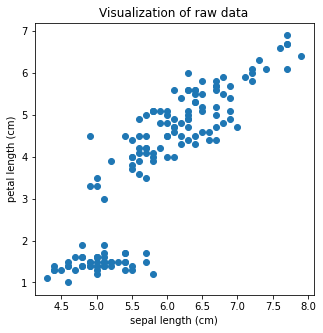

In [9]:
plt.figure(figsize = (5, 5))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Visualization of raw data');

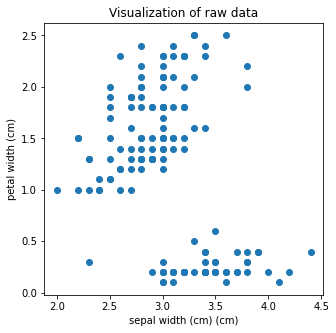

In [10]:
plt.figure(figsize = (5, 5))
plt.scatter(iris_df.iloc[:, 1], iris_df.iloc[:, 3])
plt.xlabel('sepal width (cm) (cm)')
plt.ylabel('petal width (cm)')
plt.title('Visualization of raw data');

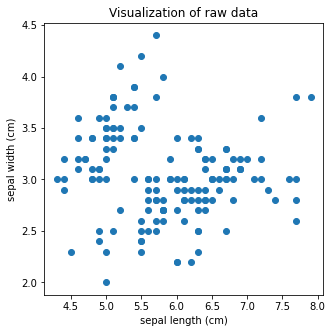

In [11]:
plt.figure(figsize = (5, 5))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Visualization of raw data');

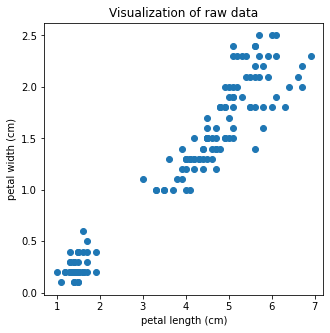

In [12]:
plt.figure(figsize = (5, 5))
plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Visualization of raw data');

### 𝐒𝐭𝐚𝐧𝐝𝐚𝐫𝐝𝐢𝐳𝐚𝐭𝐢𝐨𝐧

In [13]:
scaler = StandardScaler()
iris_df_std = scaler.fit_transform(iris_df)
#iris_df_std

### 𝐇𝐢𝐞𝐫𝐚𝐫𝐜𝐡𝐢𝐜𝐚𝐥 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠

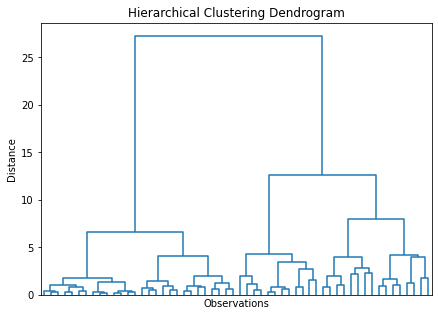

In [14]:
hier_clust = linkage(iris_df_std, method = 'ward')
plt.figure(figsize = (7,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True,
           color_threshold = 0)
plt.savefig('Hierarchical Clustering Dendrogram',dpi=500)
plt.show()

### 𝐊-𝐦𝐞𝐚𝐧𝐬 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(iris_df_std)
    wcss.append(kmeans.inertia_)

C:\Users\the  king\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


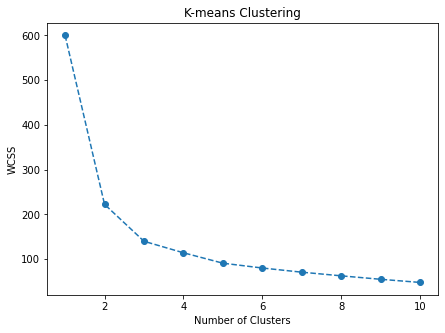

In [16]:
plt.figure(figsize = (7,5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.savefig('K-means Clustering',dpi=500)
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [18]:
kmeans.fit(iris_df_std)

KMeans(n_clusters=3, random_state=42)

### Results

In [19]:
iris_df_kmeans = iris_df.copy()
iris_df_kmeans['Segment K-means'] = kmeans.labels_
iris_df_kmeans_analysis = iris_df_kmeans.groupby(['Segment K-means']).mean()
iris_df_kmeans_analysis

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Segment K-means,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.428000,1.462000,0.246000
2,5.801887,2.673585,4.369811,1.413208


In [20]:
iris_df_kmeans_analysis['N Obs'] = iris_df_kmeans[['Segment K-means','petal width (cm)']].groupby(['Segment K-means']).count()
iris_df_kmeans_analysis['Prop Obs'] = iris_df_kmeans_analysis['N Obs'] / iris_df_kmeans_analysis['N Obs'].sum()
iris_df_kmeans_analysis

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),N Obs,Prop Obs
Segment K-means,,,,,,
0,6.780851,3.095745,5.510638,1.972340,47,0.313333
1,5.006000,3.428000,1.462000,0.246000,50,0.333333
2,5.801887,2.673585,4.369811,1.413208,53,0.353333


### Conclusion : 
We can see that the description of the Iris dataset are similiar.
Three species **setosa**, **Iris Virginica** and **Iris Versicolor** of **50** samples.